In [1]:
!pip install jovian --upgrade --quiet
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# DATA IMPORT

In [3]:
hw1990_df = pd.read_csv('h_w1990.csv',header=None)
hw1995_df = pd.read_csv('h_w1995.csv',header=None)
hw1996_df = pd.read_csv('h_w1996.csv',header=None)
hw1999_df = pd.read_csv('h_w1999.csv',header=None)
hw2000_df = pd.read_csv('h_w2000.csv',header=None)
hw2001_df = pd.read_csv('h_w2001.csv',header=None)
hw2002_df = pd.read_csv('h_w2002.csv',header=None)
hw2003_df = pd.read_csv('h_w2003.csv',header=None)
hw2004_df = pd.read_csv('h_w2004.csv',header=None)
hw2006_df = pd.read_csv('h_w2006.csv',header=None)
hw2010_df = pd.read_csv('h_w2010.csv',header=None)
hw2018_df = pd.read_csv('h_w2018.csv',header=None)

In [4]:
hw_df = pd.concat([hw1990_df, hw1995_df, hw1996_df, hw1999_df, hw2000_df, hw2001_df, hw2002_df, hw2003_df, hw2004_df, hw2006_df, hw2010_df, hw2018_df])
hw_df.rename(columns = {0:'w', 1:'h'}, inplace=True)
hw_df

,w,h
0,241.774716,26.74
1,238.110657,26.54
2,234.446598,26.34
3,230.782539,26.14
4,227.118480,25.94
...,...,...
71,73.080525,11.97
72,64.500000,11.77
73,54.333333,11.57
74,46.809524,11.37


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#rivwidth_df = pd.read_csv('Derived data.csv')
rivwidth_df = pd.read_csv('Derived data-Copy1.csv')
rivwidth_df

,date,width_mean,width_mean+20,Hobs
0,"Saturday, November 3, 1990",97.496,117.496,13.11
1,"Monday, October 16, 1995",105.866,125.866,12.91
2,"Thursday, January 4, 1996",99.288,119.288,12.22
3,"Friday, November 12, 1999",103.417,123.417,13.50
4,"Monday, November 6, 2000",97.546,117.546,12.60
5,"Tuesday, August 21, 2001",78.085,98.085,11.49
6,"Sunday, November 25, 2001",94.929,114.929,12.25
7,"Tuesday, April 2, 2002",42.294,62.294,11.18
8,"Wednesday, May 7, 2003",42.294,62.294,11.28
9,"Friday, October 8, 2004",74.078,94.078,11.98


In [7]:
k =rivwidth_df
k

,date,width_mean,width_mean+20,Hobs
0,"Saturday, November 3, 1990",97.496,117.496,13.11
1,"Monday, October 16, 1995",105.866,125.866,12.91
2,"Thursday, January 4, 1996",99.288,119.288,12.22
3,"Friday, November 12, 1999",103.417,123.417,13.50
4,"Monday, November 6, 2000",97.546,117.546,12.60
5,"Tuesday, August 21, 2001",78.085,98.085,11.49
6,"Sunday, November 25, 2001",94.929,114.929,12.25
7,"Tuesday, April 2, 2002",42.294,62.294,11.18
8,"Wednesday, May 7, 2003",42.294,62.294,11.28
9,"Friday, October 8, 2004",74.078,94.078,11.98


# CLUSTER

### K MEANS CLUSTERING

In [8]:
w_array = hw_df.iloc[:,0].values
h_array = hw_df.iloc[:,1].values
w_df = pd.DataFrame(w_array, columns=['w'])
h_df = pd.DataFrame(h_array, columns=['h'])

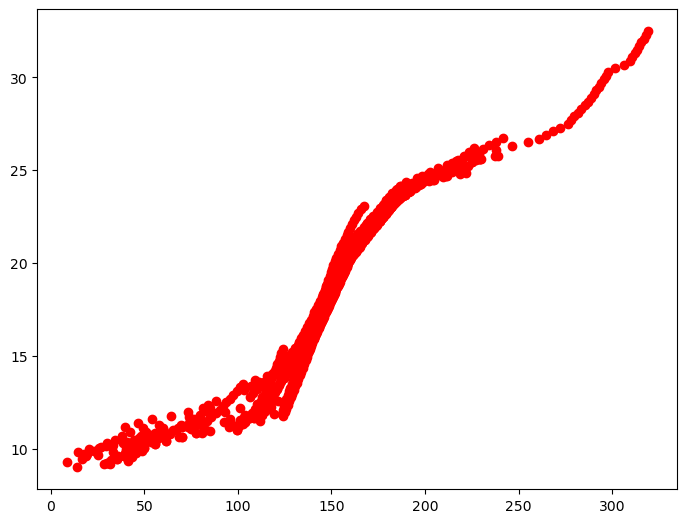

In [9]:
fig=plt.figure()
aw=fig.add_axes([0,0,1,1])
aw.scatter(w_df,h_df,color='r')

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [11]:
import matplotlib.cm as cm

In [12]:
z = hw_df
z = z.reset_index(drop=True)
z

,w,h
0,241.774716,26.74
1,238.110657,26.54
2,234.446598,26.34
3,230.782539,26.14
4,227.118480,25.94
...,...,...
991,73.080525,11.97
992,64.500000,11.77
993,54.333333,11.57
994,46.809524,11.37


Centroid coordinates:
[144.81668544]
[215.89084504]
[59.03382348]


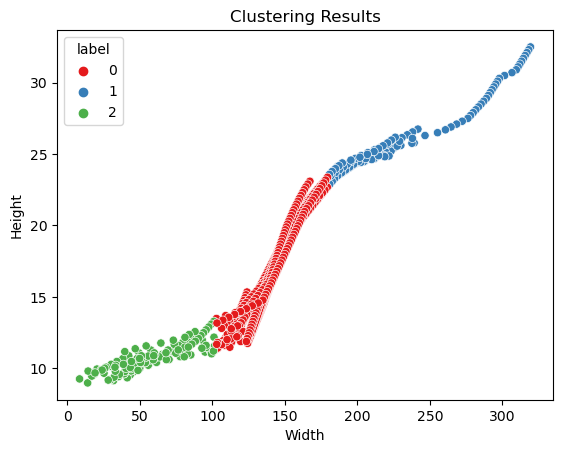

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = z
# Assuming your dataframe has a single column named 'data'
# Replace 'data' with the actual column name if it's different
data = z.w.values.reshape(-1,1)

# Create a KMeans instance with desired parameters
kmeans = KMeans(n_clusters=3, init="random", n_init=100, max_iter=300, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the cluster labels assigned by KMeans
labels = kmeans.labels_

# Get the centroid coordinates
centroids = kmeans.cluster_centers_

# Create a new column 'label' in the dataframe and assign cluster labels to it
df['label'] = labels

# Print the dataframe with the added 'label' column
# print(df)

# Print the centroid coordinates
print("Centroid coordinates:")
for centroid in centroids:
    print(centroid)

# Create a scatter plot with color-coded labels
sns.scatterplot(x='w', y='h', hue='label', palette='Set1', data=df)

# Set the axis labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Clustering Results')

# Display the plot
plt.show()

### DBSCAN

### SEE CLUSTER RESULT

In [14]:
z

,w,h,label
0,241.774716,26.74,1
1,238.110657,26.54,1
2,234.446598,26.34,1
3,230.782539,26.14,1
4,227.118480,25.94,1
...,...,...,...
991,73.080525,11.97,2
992,64.500000,11.77,2
993,54.333333,11.57,2
994,46.809524,11.37,2


# REGRESSION

In [15]:
st_w=StandardScaler()
st_h=StandardScaler()

In [16]:
#X=st_w.fit_transform(w_df)
#Y=st_h.fit_transform(h_df)

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [18]:
data_predict = k['width_mean+20'].values.reshape(-1,1)
predicted_labels = kmeans.predict(data_predict)
k['label'] = predicted_labels
k

,date,width_mean,width_mean+20,Hobs,label
0,"Saturday, November 3, 1990",97.496,117.496,13.11,0
1,"Monday, October 16, 1995",105.866,125.866,12.91,0
2,"Thursday, January 4, 1996",99.288,119.288,12.22,0
3,"Friday, November 12, 1999",103.417,123.417,13.50,0
4,"Monday, November 6, 2000",97.546,117.546,12.60,0
5,"Tuesday, August 21, 2001",78.085,98.085,11.49,2
6,"Sunday, November 25, 2001",94.929,114.929,12.25,0
7,"Tuesday, April 2, 2002",42.294,62.294,11.18,2
8,"Wednesday, May 7, 2003",42.294,62.294,11.28,2
9,"Friday, October 8, 2004",74.078,94.078,11.98,2


In [38]:
df_hrs = {"index":[],"hrs":[]}
df_hrs = pd.DataFrame(df_hrs)
for index, row in k.iterrows():
    i = row.label
    w_df = pd.DataFrame(df.w[df.label == row.label])
    h_df = pd.DataFrame(df.h[df.label == row.label])
    regressor.fit(w_df, h_df)
    rs_width_topredict = row['width_mean+20']
    rs_width_topredict_df = pd.DataFrame([rs_width_topredict], columns=['rs_width'])
    hrs_value = regressor.predict(rs_width_topredict_df)
    new_row = {'index': a, 'hrs': hrs_value}
    df_hrs.loc[len(df_hrs)] = new_row

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rs_width
Feature names seen at fit time, yet now missing:
- w

  warnings.warn(message, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
C:\Users\ACER\anaconda3\lib\site-p

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rs_width
Feature names seen at fit time, yet now missing:
- w

  warnings.warn(message, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit

In [39]:
# df_hrs
df_hrs.shape

(17, 2)

### EVALUATE

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [23]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [24]:
h_true = rivwidth_df.Hobs
h_predict = df_hrs.hrs
h_predict

0     [12.974645023028309]
1     [13.678972940251258]
2     [13.130379339284332]
3     [13.462200443619986]
4     [12.979169204869565]
5     [11.623516276851316]
6     [12.729269523204437]
7     [10.834228273300537]
8     [10.834228273300537]
9     [11.749928617013273]
10     [11.77843180719155]
11    [11.748166272546635]
12    [11.709816678518413]
13    [11.582995484297982]
14    [11.061880595687628]
15    [11.550920397522335]
16    [10.834228273300537]
Name: hrs, dtype: object

In [31]:
#The RMSE
np.sqrt(mean_squared_error(h_true,h_predict))

0.5059806914211638

In [30]:
#The MAE
mean_absolute_error(h_true,h_predict)

0.3881661337179717

In [29]:
#The r2
from sklearn.metrics import r2_score
r2_score(h_true,h_predict)

0.3441654924885764